In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
import pandas as pd

# Load the CSV file from the current folder
df = pd.read_csv("greenhouse_gas.csv")

# Display the first few rows
df.head()



,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.424,0.041,0.465,NaN,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.000,0.023,NaN,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.184,0.017,0.201,NaN,4,2,1,4,1


In [5]:
# Check column names and data types
print("📄 Columns:", df.columns)
print("\n📋 Data Types:\n", df.dtypes)

# Check for missing values
print("\n🔍 Missing Values:\n", df.isnull().sum())

# Quick overview
df.describe()


📄 Columns: Index(['Industry Code', 'Industry Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins'],
      dtype='object')

📋 Data Types:
 Industry Code                                              object
Industry Name                                              object
Substance                                                  object
Unit                                                       object
Supply Chain Emission Factors without Margins             float64
Margins of Supply Chain Emission Factors                  float64
Supply Chain Emis

,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
count,264.000000,264.000000,264.000000,0.0,264.000000,264.0,264.0,264.000000,264.0
mean,0.079905,0.002045,0.081939,NaN,3.405303,2.0,1.0,2.810606,1.0
std,0.264646,0.007644,0.266796,NaN,0.557127,0.0,0.0,1.252420,0.0
min,0.000000,0.000000,0.000000,NaN,2.000000,2.0,1.0,1.000000,1.0
25%,0.000000,0.000000,0.000000,NaN,3.000000,2.0,1.0,1.000000,1.0
50%,0.002000,0.000000,0.002000,NaN,3.000000,2.0,1.0,3.000000,1.0
75%,0.040750,0.000000,0.040750,NaN,4.000000,2.0,1.0,4.000000,1.0
max,3.425000,0.053000,3.425000,NaN,4.000000,2.0,1.0,5.000000,1.0


In [6]:
features = [
    'supply_chain_emission_factors_without_margins',
    'margins_of_supply_chain_emission_factors',
    'dq_reliabilityscore_of_factors_without_margins',
    'dq_temporalcorrelation_of_factors_without_margins',
    'dq_geographicalcorrelation_of_factors_without_margins',
    'dq_technologicalcorrelation_of_factors_without_margins',
    'dq_datacollection_of_factors_without_margins'
]

target = 'supply_chain_emission_factors_with_margins'

X = df[features]
y = df[target]


KeyError: "None of [Index(['supply_chain_emission_factors_without_margins',\n       'margins_of_supply_chain_emission_factors',\n       'dq_reliabilityscore_of_factors_without_margins',\n       'dq_temporalcorrelation_of_factors_without_margins',\n       'dq_geographicalcorrelation_of_factors_without_margins',\n       'dq_technologicalcorrelation_of_factors_without_margins',\n       'dq_datacollection_of_factors_without_margins'],\n      dtype='object')] are in the [columns]"

In [7]:
print(df.columns.tolist())


['Industry Code', 'Industry Name', 'Substance', 'Unit', 'Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins', 'Unnamed: 7', 'DQ ReliabilityScore of Factors without Margins', 'DQ TemporalCorrelation of Factors without Margins', 'DQ GeographicalCorrelation of Factors without Margins', 'DQ TechnologicalCorrelation of Factors without Margins', 'DQ DataCollection of Factors without Margins']


In [8]:
features = [
    'supply_chain_emission_factors_without_margins',
    'margins_of_supply_chain_emission_factors',
    'dq_reliabilityscore_of_factors_without_margins',
    'dq_temporalcorrelation_of_factors_without_margins',
    'dq_geographicalcorrelation_of_factors_without_margins',
    'dq_technologicalcorrelation_of_factors_without_margins',
    'dq_datacollection_of_factors_without_margins'
]

target = 'supply_chain_emission_factors_with_margins'

X = df[features]
y = df[target]


KeyError: "None of [Index(['supply_chain_emission_factors_without_margins',\n       'margins_of_supply_chain_emission_factors',\n       'dq_reliabilityscore_of_factors_without_margins',\n       'dq_temporalcorrelation_of_factors_without_margins',\n       'dq_geographicalcorrelation_of_factors_without_margins',\n       'dq_technologicalcorrelation_of_factors_without_margins',\n       'dq_datacollection_of_factors_without_margins'],\n      dtype='object')] are in the [columns]"

In [9]:
# Print column names exactly as they appear in your DataFrame
print(df.columns.tolist())


['Industry Code', 'Industry Name', 'Substance', 'Unit', 'Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins', 'Unnamed: 7', 'DQ ReliabilityScore of Factors without Margins', 'DQ TemporalCorrelation of Factors without Margins', 'DQ GeographicalCorrelation of Factors without Margins', 'DQ TechnologicalCorrelation of Factors without Margins', 'DQ DataCollection of Factors without Margins']


In [10]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")


In [11]:
# Normalize all column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")

# Check the actual cleaned column names
print(df.columns.tolist())


['industry_code', 'industry_name', 'substance', 'unit', 'supply_chain_emission_factors_without_margins', 'margins_of_supply_chain_emission_factors', 'supply_chain_emission_factors_with_margins', 'unnamed:_7', 'dq_reliabilityscore_of_factors_without_margins', 'dq_temporalcorrelation_of_factors_without_margins', 'dq_geographicalcorrelation_of_factors_without_margins', 'dq_technologicalcorrelation_of_factors_without_margins', 'dq_datacollection_of_factors_without_margins']


In [12]:
features = [
    'supply_chain_emission_factors_without_margins',
    'margins_of_supply_chain_emission_factors',
    'dq_reliabilityscore_of_factors_without_margins',
    'dq_temporalcorrelation_of_factors_without_margins',
    'dq_geographicalcorrelation_of_factors_without_margins',
    'dq_technologicalcorrelation_of_factors_without_margins',
    'dq_datacollection_of_factors_without_margins'
]

target = 'supply_chain_emission_factors_with_margins'

X = df[features]
y = df[target]


In [13]:
# Step 1: Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")

# Step 2: Define features and target
features = [
    'supply_chain_emission_factors_without_margins',
    'margins_of_supply_chain_emission_factors',
    'dq_reliabilityscore_of_factors_without_margins',
    'dq_temporalcorrelation_of_factors_without_margins',
    'dq_geographicalcorrelation_of_factors_without_margins',
    'dq_technologicalcorrelation_of_factors_without_margins',
    'dq_datacollection_of_factors_without_margins'
]

target = 'supply_chain_emission_factors_with_margins'

X = df[features]
y = df[target]


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [16]:
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate(model_name, y_test, y_pred):
    print(f"\n📊 {model_name} Evaluation:")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))

evaluate("Linear Regression", y_test, lr_pred)
evaluate("Random Forest", y_test, rf_pred)



📊 Linear Regression Evaluation:
MSE: 9.720553168429466e-10
R2 Score: 0.9999999554702931

📊 Random Forest Evaluation:
MSE: 0.00043834031022665313
R2 Score: 0.9799196967308652


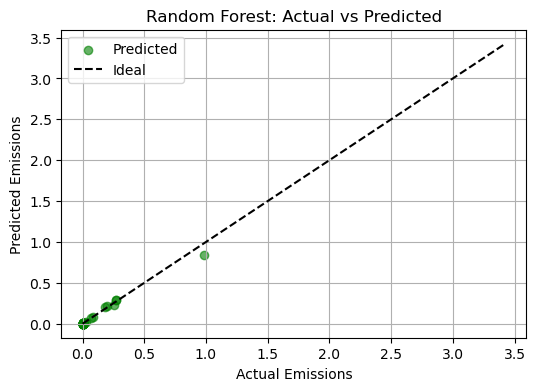

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(y_test, rf_pred, alpha=0.6, color='green', label="Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label="Ideal")
plt.xlabel("Actual Emissions")
plt.ylabel("Predicted Emissions")
plt.title("Random Forest: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
!pip install xgboost shap


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [21]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=4)
xgb_model.fit(X_train, y_train)

# Predict
xgb_pred = xgb_model.predict(X_test)

# Evaluate
print("📊 XGBoost Evaluation:")
print("MSE:", mean_squared_error(y_test, xgb_pred))
print("R² Score:", r2_score(y_test, xgb_pred))


📊 XGBoost Evaluation:
MSE: 0.0003275585743453564
R² Score: 0.9849945912848874


C:\Users\84T g4\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


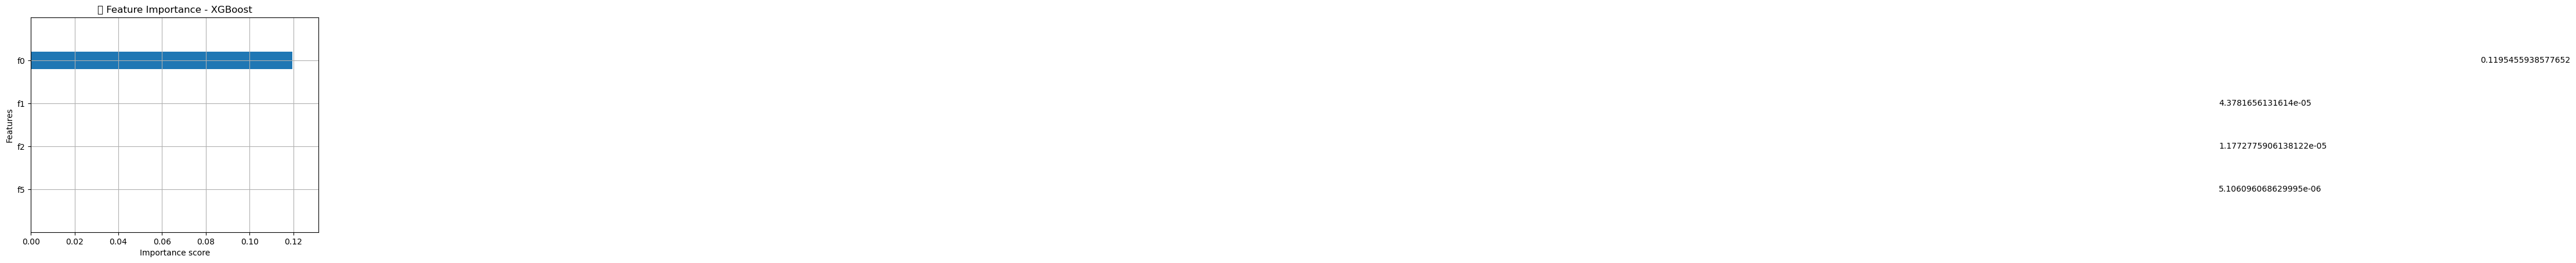

In [22]:
import matplotlib.pyplot as plt

xgb.plot_importance(xgb_model, importance_type='gain', height=0.4)
plt.title("🔍 Feature Importance - XGBoost")
plt.show()


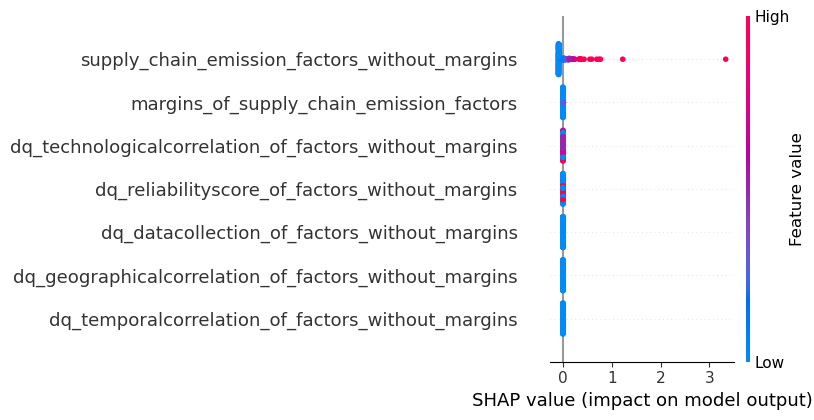

In [23]:
import shap

explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_train)

# Summary plot
shap.summary_plot(shap_values, X_train, feature_names=features)


In [24]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42))
]

stacked_model = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(alpha=1.0)
)

stacked_model.fit(X_train, y_train)
y_pred_stack = stacked_model.predict(X_test)


MSE: 0.0014844260566170431
R²: 0.9319986670127067


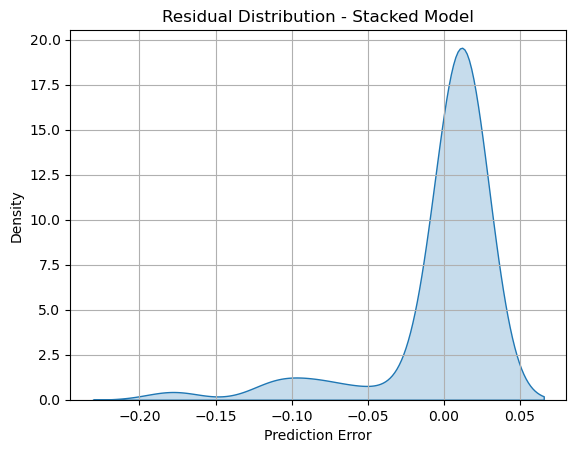

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred_stack))
print("R²:", r2_score(y_test, y_pred_stack))

# Residual Plot
residuals = y_test - y_pred_stack
sns.kdeplot(residuals, fill=True)
plt.title("Residual Distribution - Stacked Model")
plt.xlabel("Prediction Error")
plt.grid(True)
plt.show()


ExactExplainer explainer: 54it [00:22,  2.34it/s]                        


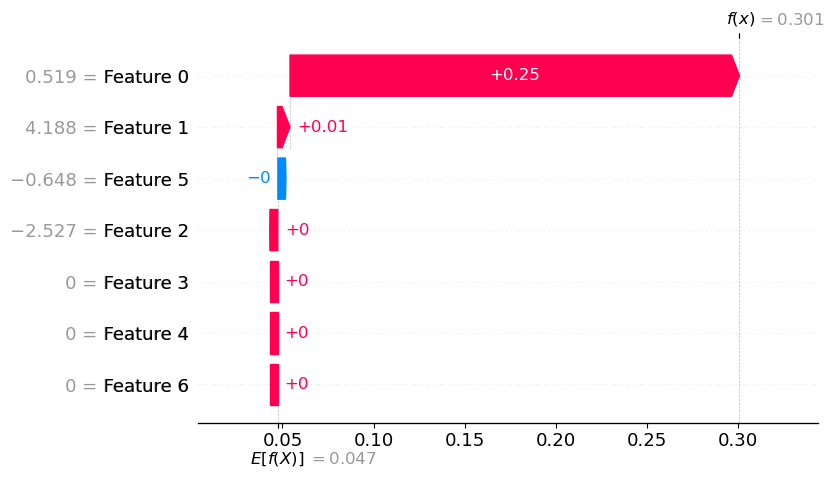

In [26]:
import shap

explainer = shap.Explainer(stacked_model.predict, X_test)
shap_values = explainer(X_test)

# Waterfall for first test row
shap.plots.waterfall(shap_values[0])
